In [136]:
import os
os.chdir("C:\\Users\\Poori\\Desktop\\Delloite\\AirBnB10K")

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
houses_train=pd.read_csv("train10k.csv")
houses_test=pd.read_csv("test2k.csv")

In [138]:
houses_train.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,5506438,4.605170,Apartment,Entire home/apt,"{""Wireless Internet"",""Wheelchair accessible"",K...",3,1.0,Real Bed,flexible,False,...,40.859270,-73.929658,Spacious 1 Bd. Apt. Inwood near Fort Tryon Park,Washington Heights,0,NaN,https://a0.muscache.com/im/pictures/8d65b600-3...,10040,2.0,1.0
1,12343026,5.010635,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,flexible,True,...,40.738295,-74.006016,Lovely 1BR West Village Apartment,West Village,0,NaN,https://a0.muscache.com/im/pictures/9c1b8f62-1...,10014,1.0,1.0
2,9493786,4.077537,House,Private room,"{""Wireless Internet"",Kitchen,""Free parking on ...",3,1.5,Real Bed,moderate,True,...,40.662847,-73.946532,2. Private Room with nice queen bed,East Flatbush,0,NaN,https://a0.muscache.com/im/pictures/756d845e-3...,11225,1.0,1.0
3,9961396,5.686975,Apartment,Entire home/apt,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",1,1.0,Real Bed,flexible,False,...,40.796835,-73.970703,Upper West Side Large Private Bdrm,Upper West Side,0,NaN,https://a0.muscache.com/im/pictures/106971386/...,10025,1.0,1.0
4,4820071,5.991465,Apartment,Entire home/apt,"{TV,Pool,Kitchen,Gym,Elevator,Heating,""Family/...",3,1.0,Real Bed,strict,True,...,37.782340,-122.397179,GREAT location!!!!,SoMa,4,90.0,https://a0.muscache.com/im/pictures/105087954/...,94107,1.0,1.0


In [139]:
houses_test.columns
#houses_test[]

Index(['id', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'description', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [140]:
houses_train.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [141]:
houses_test.columns
houses_train=houses_test.copy()

In [142]:
houses_train["property_type"].unique()

array(['Bungalow', 'Apartment', 'House', 'Townhouse', 'Condominium',
       'Other', 'Loft', 'Bed & Breakfast', 'In-law', 'Guesthouse', 'Dorm',
       'Guest suite', 'Hostel', 'Boutique hotel', 'Camper/RV',
       'Treehouse', 'Villa', 'Timeshare', 'Yurt', 'Boat'], dtype=object)

In [143]:
houses_train.describe()

,id,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
count,2.000000e+03,2000.000000,1993.000000,2000.000000,2000.000000,2000.000000,1574.000000,1973.000000,1998.000000,1998.000000
mean,1.102315e+07,3.202000,1.248620,38.499281,-92.035373,19.716000,93.871665,44278.756716,1.303804,1.738238
std,6.151881e+06,2.121661,0.604559,3.053871,21.580631,36.045568,7.996188,38433.106748,0.865112,1.217486
min,5.728000e+03,1.000000,0.000000,33.712008,-122.509156,0.000000,20.000000,2108.000000,0.000000,1.000000
25%,5.777224e+06,2.000000,1.000000,34.148024,-118.338725,1.000000,91.000000,11101.000000,1.000000,1.000000
50%,1.207509e+07,2.000000,1.000000,40.668503,-76.994034,6.000000,96.000000,20001.000000,1.000000,1.000000
75%,1.623296e+07,4.000000,1.000000,40.745756,-73.953249,22.000000,100.000000,90065.000000,2.000000,2.000000
max,2.122236e+07,16.000000,8.000000,42.378898,-71.034889,442.000000,100.000000,94158.000000,7.000000,14.000000


In [144]:
houses_train["room_type"].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [145]:
len(list(houses_train["amenities"].unique()))

1977

In [146]:
#houses=pd.concat([houses_train,houses_test],keys=['train','test'])
#houses.head()

In [147]:
#houses_test.head()
from sklearn.preprocessing import OneHotEncoder 
houses_train['amenities'].head()

0    {TV,Internet,"Wireless Internet","Air conditio...
1    {TV,"Cable TV",Internet,"Wireless Internet","A...
2    {TV,Internet,"Wireless Internet","Air conditio...
3    {TV,"Wireless Internet",Kitchen,Breakfast,"Ind...
4    {TV,Internet,"Wireless Internet","Air conditio...
Name: amenities, dtype: object

In [148]:
houses_train['amenities']=houses_train['amenities'].str.replace("{","")
houses_train['amenities']=houses_train['amenities'].str.replace("}","")
houses_train['amenities']

0       TV,Internet,"Wireless Internet","Air condition...
1       TV,"Cable TV",Internet,"Wireless Internet","Ai...
2       TV,Internet,"Wireless Internet","Air condition...
3       TV,"Wireless Internet",Kitchen,Breakfast,"Indo...
4       TV,Internet,"Wireless Internet","Air condition...
                              ...                        
1995    TV,"Wireless Internet",Kitchen,"Free parking o...
1996    TV,"Cable TV",Internet,"Wireless Internet","Ai...
1997    "Wireless Internet","Air conditioning",Kitchen...
1998    TV,"Cable TV","Wireless Internet","Air conditi...
1999    TV,Internet,"Wireless Internet","Air condition...
Name: amenities, Length: 2000, dtype: object

In [149]:
count=0
lst=[]
for i in houses_train['amenities']:
    st=i.split(',')
    lst.extend(st)
    lst=set(lst)
    lst=list(lst)
    count+=1
    #if count==3:
    #    break

#print(lst)
#print(i)
j=houses_train['amenities'][0]
#print(j.split(','))
l=j.split(',')
k=list(i.split(','))
#i.split(',').replace("{","").replace("}","")

len(lst)
lst.pop(0)
lst

['"Paid parking off premises"',
 '"Wide hallway clearance"',
 '"Children’s books and toys"',
 'Bathtub',
 '"Smart lock"',
 '"Air conditioning"',
 '"Free parking on premises"',
 '"Free parking on street"',
 'Shampoo',
 '"Accessible-height bed"',
 'Breakfast',
 '"Pets allowed"',
 '"Private entrance"',
 'Iron',
 ' smooth pathway to front door"',
 '"Pocket wifi"',
 '"Fixed grab bars for shower & toilet"',
 'Elevator',
 '"Fireplace guards"',
 '"Suitable for events"',
 'Pool',
 '"Wheelchair accessible"',
 '"Outlet covers"',
 '"Changing table"',
 '"Dishes and silverware"',
 '"Well-lit path to entrance"',
 '"Babysitter recommendations"',
 'Smartlock',
 '"Hot water kettle"',
 '"Doorman Entry"',
 'Oven',
 '"Patio or balcony"',
 '"Cooking basics"',
 '"Safety card"',
 'Washer',
 'Doorman',
 '"Wireless Internet"',
 '"Smoke detector"',
 'Hangers',
 '"Lock on bedroom door"',
 'Beachfront',
 '"Flat',
 'Lockbox',
 '"Disabled parking spot"',
 '"Hot tub"',
 '"Carbon monoxide detector"',
 '"Extra pillows 

In [150]:
houses_train_copy=houses_train.copy()
for i in lst:
    houses_train_copy[i]=0
#houses_train_copy['"Changing table"']
st=[]
row=0
for i in houses_train_copy['amenities']:
    st=i.split(',')
    for i in st:
        houses_train_copy.loc[row,i]=1
        #houses_train_copy[i][row]=1
    row+=1
houses_train_copy['"Changing table"']

0       0
1       0
2       0
3       0
4       0
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: "Changing table", Length: 2000, dtype: int64

In [15]:
#houses_train_copy=houses_train_copy.iloc[:,0:151]
#print(houses_train_copy.iloc[:,150].value_counts())
#print(houses_train_copy.iloc[:,150].head())

In [151]:
houses_train_copy[houses_train_copy['"Changing table"']==1]

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,"""translation missing: en.hosting_amenity_49""","""Private living room""","""Beach essentials""",Heating,"""Fire extinguisher""","""Cleaning before checkout""",Dog(s),Gym,"""Washer / Dryer""",
167,2560624,House,Entire home/apt,"TV,""Wireless Internet"",""Air conditioning"",Pool...",9,3.0,Real Bed,moderate,True,LA,...,0,0,0,1,1,0,0,0,0,NaN
874,6827028,House,Entire home/apt,"TV,Internet,""Wireless Internet"",Kitchen,""Pets ...",5,1.0,Real Bed,moderate,True,SF,...,0,0,0,1,0,0,0,0,0,NaN
1096,7518967,Apartment,Entire home/apt,"TV,""Cable TV"",""Wireless Internet"",""Air conditi...",7,2.0,Real Bed,flexible,True,NYC,...,0,0,0,1,1,0,0,1,0,NaN
1105,7382294,Apartment,Entire home/apt,"TV,""Cable TV"",Internet,""Wireless Internet"",""Ai...",4,2.0,Real Bed,moderate,True,NYC,...,0,0,0,1,1,0,0,0,0,NaN
1153,19998578,Loft,Entire home/apt,"TV,""Cable TV"",Internet,""Wireless Internet"",""Ai...",8,2.0,Real Bed,strict,True,NYC,...,0,0,0,1,1,0,0,0,0,NaN
1786,18915587,House,Entire home/apt,"TV,""Wireless Internet"",""Air conditioning"",Kitc...",4,1.5,Real Bed,strict,False,Boston,...,0,0,0,1,1,0,0,0,0,NaN


In [152]:
list(houses_train.columns)

['id',
 'property_type',
 'room_type',
 'amenities',
 'accommodates',
 'bathrooms',
 'bed_type',
 'cancellation_policy',
 'cleaning_fee',
 'city',
 'description',
 'first_review',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_response_rate',
 'host_since',
 'instant_bookable',
 'last_review',
 'latitude',
 'longitude',
 'name',
 'neighbourhood',
 'number_of_reviews',
 'review_scores_rating',
 'thumbnail_url',
 'zipcode',
 'bedrooms',
 'beds']

In [153]:
#sorted(houses_train_copy.isnull().sum(),reverse=True)
houses_train_copy.iloc[:,0:40].isnull().sum()
# bathrooms, first_review, host_has_profile_pic, host_identity_verified, host_response_rate, host_since, last_review
# neighbourhood, review_scores_rating, thumbnail_url, zipcode, bedrooms, beds

id                               0
property_type                    0
room_type                        0
amenities                        0
accommodates                     0
bathrooms                        7
bed_type                         0
cancellation_policy              0
cleaning_fee                     0
city                             0
description                      0
first_review                   408
host_has_profile_pic             4
host_identity_verified           4
host_response_rate             509
host_since                       4
instant_bookable                 0
last_review                    407
latitude                         0
longitude                        0
name                             1
neighbourhood                  191
number_of_reviews                0
review_scores_rating           426
thumbnail_url                  236
zipcode                         27
bedrooms                         2
beds                             2
"Paid parking off pr

In [88]:
#houses_train_copy['bathrooms']=houses_train_copy['bathrooms'].apply(np.floor)

In [154]:
houses_train_copy.head()

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,"""translation missing: en.hosting_amenity_49""","""Private living room""","""Beach essentials""",Heating,"""Fire extinguisher""","""Cleaning before checkout""",Dog(s),Gym,"""Washer / Dryer""",
0,6375849,Bungalow,Private room,"TV,Internet,""Wireless Internet"",""Air condition...",2,1.0,Real Bed,strict,True,LA,...,0,0,0,1,0,0,0,0,0,NaN
1,4188426,Apartment,Entire home/apt,"TV,""Cable TV"",Internet,""Wireless Internet"",""Ai...",2,1.0,Real Bed,strict,True,LA,...,0,0,0,1,0,0,0,0,0,NaN
2,12090887,Apartment,Entire home/apt,"TV,Internet,""Wireless Internet"",""Air condition...",3,1.0,Real Bed,strict,True,LA,...,0,0,0,1,0,0,0,1,0,NaN
3,4150932,House,Entire home/apt,"TV,""Wireless Internet"",Kitchen,Breakfast,""Indo...",4,2.0,Real Bed,strict,False,LA,...,1,0,0,1,0,0,0,0,0,NaN
4,883306,Apartment,Entire home/apt,"TV,Internet,""Wireless Internet"",""Air condition...",4,1.0,Real Bed,strict,True,NYC,...,0,0,0,1,0,0,0,0,0,NaN


In [90]:
#houses_train_copy['bathrooms']=pd.to_numeric(houses_train_copy['bathrooms'], downcast='integer')
#houses_train_copy['bathrooms']=houses_train_copy['bathrooms'].astype(int)

In [159]:
houses_train_copy.head()
houses_train_copy.ndim
houses_train_copy.shape

(2000, 146)

In [160]:
# bathrooms, first_review, host_has_profile_pic, host_identity_verified, host_response_rate, host_since, last_review
# neighbourhood, review_scores_rating, thumbnail_url, zipcode, bedrooms, beds

#sorted(houses_train_copy.isnull().sum(),reverse=True)
houses_train_copy.iloc[:,0:41].isnull().sum()
#host_has_profile_pic        21
#host_identity_verified      21
#host_since                  21
#houses_train_copy[houses_train_copy["host_has_profile_pic"]==np.nan]
houses_train_copy[pd.isnull(houses_train_copy["host_has_profile_pic"])][{"host_has_profile_pic","host_identity_verified","host_since"}]

,host_since,host_identity_verified,host_has_profile_pic
509,NaN,NaN,NaN
660,NaN,NaN,NaN
1349,NaN,NaN,NaN
1758,NaN,NaN,NaN


In [93]:
indx=houses_train_copy[pd.isnull(houses_train_copy["host_has_profile_pic"])].iloc()
#list(indx)
indx

In [161]:
#houses_train_copy.dropna(subset=['host_has_profile_pic'], inplace=True)
houses_train_copy.iloc[:,0:50].isnull().sum()

id                                         0
property_type                              0
room_type                                  0
amenities                                  0
accommodates                               0
bathrooms                                  7
bed_type                                   0
cancellation_policy                        0
cleaning_fee                               0
city                                       0
description                                0
first_review                             408
host_has_profile_pic                       4
host_identity_verified                     4
host_response_rate                       509
host_since                                 4
instant_bookable                           0
last_review                              407
latitude                                   0
longitude                                  0
name                                       1
neighbourhood                            191
number_of_

In [95]:
houses_train_copy["neighbourhood"].value_counts()

Williamsburg          79
Bushwick              60
Bedford-Stuyvesant    52
Hollywood             41
Mid-Wilshire          40
                      ..
Dongan Hills           1
Montecito Heights      1
Bellevue               1
Lynwood                1
Carson                 1
Name: neighbourhood, Length: 330, dtype: int64

In [96]:
houses_train_copy["city"].value_counts()

NYC        880
LA         588
SF         172
DC         162
Chicago    108
Boston      86
Name: city, dtype: int64

In [97]:
#name, thumbnail_url, first_review, last_review, host_response_rate, zipcode, thumbnail_url, review_scores_rating

In [162]:
houses_train_copy.drop(["name","thumbnail_url","first_review","last_review","host_response_rate","zipcode","thumbnail_url","review_scores_rating"],axis=1,inplace=True)

In [163]:
houses_train_copy.iloc[:,0:50].isnull().sum()

id                                         0
property_type                              0
room_type                                  0
amenities                                  0
accommodates                               0
bathrooms                                  7
bed_type                                   0
cancellation_policy                        0
cleaning_fee                               0
city                                       0
description                                0
host_has_profile_pic                       4
host_identity_verified                     4
host_since                                 4
instant_bookable                           0
latitude                                   0
longitude                                  0
neighbourhood                            191
number_of_reviews                          0
bedrooms                                   2
beds                                       2
"Paid parking off premises"                0
"Wide hall

In [164]:
#houses_train_copy.dropna(subset=['bathrooms','bedrooms','beds'], inplace=True)

#houses_train_copy_duplicate=houses_train_copy.copy()

houses_train_copy.iloc[:,0:50].isnull().sum()

id                                         0
property_type                              0
room_type                                  0
amenities                                  0
accommodates                               0
bathrooms                                  7
bed_type                                   0
cancellation_policy                        0
cleaning_fee                               0
city                                       0
description                                0
host_has_profile_pic                       4
host_identity_verified                     4
host_since                                 4
instant_bookable                           0
latitude                                   0
longitude                                  0
neighbourhood                            191
number_of_reviews                          0
bedrooms                                   2
beds                                       2
"Paid parking off premises"                0
"Wide hall

C:\Users\Poori\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


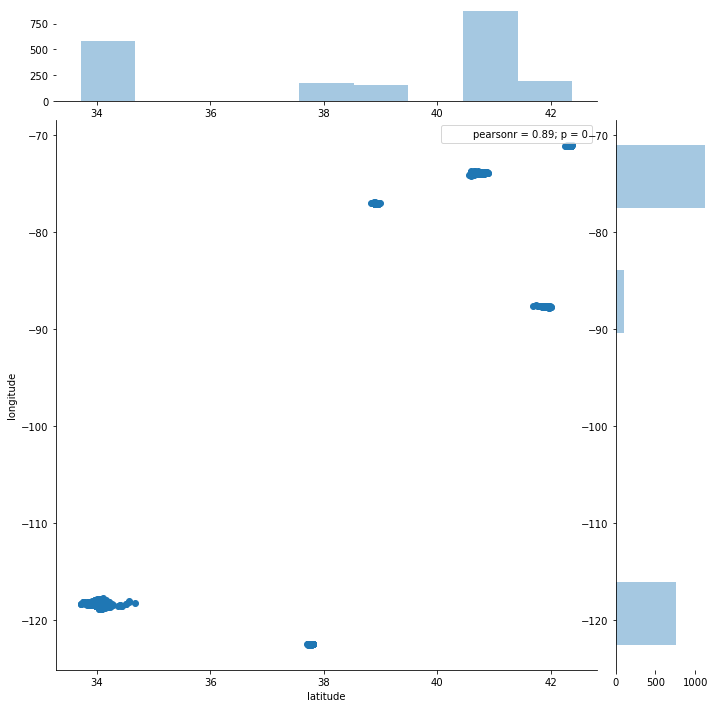

In [101]:
import seaborn as sns
sns.jointplot(x=houses_train_copy.latitude,y=houses_train_copy.longitude,size=10)

In [165]:
houses_train_copy.drop(["neighbourhood","description","amenities"],axis=1,inplace=True)

sum(houses_train_copy.isnull().sum()) #here neighbourhood is removed as we already have longitude and latitude information

2010

In [179]:
houses_train_copy.columns[-1]

''

In [180]:
#houses_train_copy.iloc[:,100:150].isnull().sum()
#houses_train_copy.iloc[:,-1]
houses_train_copy.drop(houses_train_copy.columns[-1],axis=1,inplace=True)

In [187]:
houses_train_copy["bathrooms"].describe()

count    1993.000000
mean        1.248620
std         0.604559
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         8.000000
Name: bathrooms, dtype: float64

In [188]:
houses_train_copy["bathrooms"].fillna(1, inplace = True)  

In [192]:
houses_train_copy["host_has_profile_pic"].value_counts()

t    1989
f       7
Name: host_has_profile_pic, dtype: int64

In [193]:
houses_train_copy["host_has_profile_pic"].fillna("t", inplace = True)

In [195]:
houses_train_copy["host_identity_verified"].value_counts()

t    1327
f     669
Name: host_identity_verified, dtype: int64

In [196]:
houses_train_copy["host_identity_verified"].fillna("t", inplace = True)

In [199]:
houses_train_copy["host_since"].value_counts()

2014-02-14    8
2014-06-10    6
2013-10-14    6
2016-01-18    6
2015-05-21    5
             ..
2013-10-15    1
2013-01-30    1
2011-04-01    1
2015-11-08    1
2013-02-01    1
Name: host_since, Length: 1339, dtype: int64

In [202]:
houses_train_copy["host_since"].fillna(method ='pad',inplace=True)

In [205]:
houses_train_copy["bedrooms"].value_counts()

1.0    1328
2.0     310
0.0     166
3.0     138
4.0      43
5.0       8
6.0       4
7.0       1
Name: bedrooms, dtype: int64

In [206]:
houses_train_copy["bedrooms"].fillna(1, inplace = True)

In [208]:
houses_train_copy["beds"].value_counts()

1.0     1194
2.0      446
3.0      192
4.0       92
5.0       38
6.0       18
7.0        9
8.0        6
10.0       2
14.0       1
Name: beds, dtype: int64

In [209]:
houses_train_copy["beds"].fillna(1, inplace = True)

In [210]:
houses_train_copy.iloc[:,0:50].isnull().sum()

id                                       0
property_type                            0
room_type                                0
accommodates                             0
bathrooms                                0
bed_type                                 0
cancellation_policy                      0
cleaning_fee                             0
city                                     0
host_has_profile_pic                     0
host_identity_verified                   0
host_since                               0
instant_bookable                         0
latitude                                 0
longitude                                0
number_of_reviews                        0
bedrooms                                 0
beds                                     0
"Paid parking off premises"              0
"Wide hallway clearance"                 0
"Children’s books and toys"              0
Bathtub                                  0
"Smart lock"                             0
"Air condit

In [212]:
sum(houses_train_copy.isnull().sum())
houses_train_copy.shape

(2000, 135)

In [213]:
houses_train_copy['bathrooms']=houses_train_copy['bathrooms'].astype(int)
houses_train_copy['bathrooms'].head()

0    1
1    1
2    1
3    2
4    1
Name: bathrooms, dtype: int32

In [214]:
list(houses_train_copy.columns)

['id',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bed_type',
 'cancellation_policy',
 'cleaning_fee',
 'city',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_since',
 'instant_bookable',
 'latitude',
 'longitude',
 'number_of_reviews',
 'bedrooms',
 'beds',
 '"Paid parking off premises"',
 '"Wide hallway clearance"',
 '"Children’s books and toys"',
 'Bathtub',
 '"Smart lock"',
 '"Air conditioning"',
 '"Free parking on premises"',
 '"Free parking on street"',
 'Shampoo',
 '"Accessible-height bed"',
 'Breakfast',
 '"Pets allowed"',
 '"Private entrance"',
 'Iron',
 ' smooth pathway to front door"',
 '"Pocket wifi"',
 '"Fixed grab bars for shower & toilet"',
 'Elevator',
 '"Fireplace guards"',
 '"Suitable for events"',
 'Pool',
 '"Wheelchair accessible"',
 '"Outlet covers"',
 '"Changing table"',
 '"Dishes and silverware"',
 '"Well-lit path to entrance"',
 '"Babysitter recommendations"',
 'Smartlock',
 '"Hot water kettle"',
 '"Doorman Entry"',
 'Oven',
 '"P

In [215]:
#from sklearn.preprocessing import LabelEncoder 
#le = LabelEncoder() 
#data['Gender']= le.fit_transform(data['Gender']) 
#data['Geography']= le.fit_transform(data['Geography'])
houses_train_copy.info

<bound method DataFrame.info of             id property_type        room_type  accommodates  bathrooms  \
0      6375849      Bungalow     Private room             2          1   
1      4188426     Apartment  Entire home/apt             2          1   
2     12090887     Apartment  Entire home/apt             3          1   
3      4150932         House  Entire home/apt             4          2   
4       883306     Apartment  Entire home/apt             4          1   
...        ...           ...              ...           ...        ...   
1995   2117401     Apartment  Entire home/apt             4          1   
1996  18086316   Condominium  Entire home/apt             6          2   
1997   7480853         House  Entire home/apt             4          1   
1998  14520287     Apartment      Shared room             2          1   
1999    798100     Apartment  Entire home/apt             2          1   

      bed_type cancellation_policy  cleaning_fee     city  \
0     Real Bed    

In [216]:
from datetime import date
today=date.today()
print(today)

today=pd.to_datetime(today)

houses_train_copy["host_since"].dtype

houses_train_copy['host_since']=pd.to_datetime(houses_train_copy['host_since'])

(today-houses_train_copy["host_since"][0]).days
#houses_train_copy["host_since"].dtype

2020-03-31


1205

In [217]:
#houses_train_copy_duplicate1=houses_train_copy.copy()

#houses_train_copy=houses_train_copy_duplicate1

houses_train_copy["host_since"]=today-houses_train_copy["host_since"]

In [218]:
houses_train_copy["host_since"].head()
str(houses_train_copy["host_since"][0])

import re
int(re.findall('\d+',str(houses_train_copy["host_since"][0]))[0])


host_since_days=[int(re.findall('\d+',str(houses_train_copy["host_since"].iloc[i]))[0]) for i in range(len(houses_train_copy["host_since"]))]
print(len(host_since_days))
print(len(houses_train_copy["host_since"]))


houses_train_copy["host_since"]=host_since_days
houses_train_copy["host_since"].head()

2000
2000


0    1205
1    3075
2    1280
3    3009
4    2142
Name: host_since, dtype: int64

In [109]:
#int(str(houses_train_copy["host_since"][0])[0:4])

In [402]:
#[int(str(houses_train_copy["host_since"][i])[0:4]) for i in range(len(houses_train_copy["host_since"]))]

In [426]:
# property_type room_type bed_type cancellation_policy city number_of_reviews 

# cleaning_fee (1,0) host_identity_verified (1,0) instant_bookable (1,0) host_has_profile_pic (1,0)

# accommodates bathrooms bedrooms beds latitude longitude host_since

In [219]:
houses_train_copy["cleaning_fee"].unique()
#houses_train_copy["cleaning_fee"][0]

array([ True, False])

In [220]:
houses_train_copy['cleaning_fee']=houses_train_copy['cleaning_fee'].apply(lambda x: 0 if x==False else 1)

In [229]:
houses_train_copy["host_identity_verified"].unique()

array([0, 1], dtype=int64)

In [222]:
houses_train_copy['host_identity_verified']=houses_train_copy['host_identity_verified'].apply(lambda x: 0 if x=="f" else 1)

In [228]:
houses_train_copy["instant_bookable"].unique()

array([0, 1], dtype=int64)

In [224]:
houses_train_copy['instant_bookable']=houses_train_copy['instant_bookable'].apply(lambda x: 0 if x=="f" else 1)

In [230]:
houses_train_copy["host_has_profile_pic"].unique()

array([1, 0], dtype=int64)

In [226]:
houses_train_copy['host_has_profile_pic']=houses_train_copy['host_has_profile_pic'].apply(lambda x: 0 if x=="f" else 1)

In [118]:
#houses_train_copy_duplicate2=houses_train_copy
#houses_tran_copy=houses_train_copy_duplicate2.copy()

In [231]:
houses_train_copy.columns

Index(['id', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'host_has_profile_pic',
       ...
       '"Ethernet connection"', '"translation missing: en.hosting_amenity_49"',
       '"Private living room"', '"Beach essentials"', 'Heating',
       '"Fire extinguisher"', '"Cleaning before checkout"', 'Dog(s)', 'Gym',
       '"Washer / Dryer"'],
      dtype='object', length=135)

In [232]:
# property_type room_type bed_type cancellation_policy city number_of_reviews 
houses_train_copy_dummies=pd.get_dummies(houses_train_copy, columns=['property_type', 'room_type','bed_type','cancellation_policy','city'])

In [233]:
houses_train_copy_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 169 entries, id to city_SF
dtypes: float64(4), int32(1), int64(125), uint8(39)
memory usage: 2.1 MB


In [234]:
houses_train_copy_dummies['bathrooms']=houses_train_copy_dummies['bathrooms'].astype(int)
houses_train_copy_dummies['bathrooms'].head()

0    1
1    1
2    1
3    2
4    1
Name: bathrooms, dtype: int32

In [235]:
houses_train_copy_dummies.head()

,id,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,host_since,instant_bookable,latitude,longitude,...,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF
0,6375849,2,1,1,1,0,1205,0,34.041205,-118.375735,...,0,1,0,0,0,0,0,1,0,0
1,4188426,2,1,1,1,1,3075,0,34.085591,-118.264554,...,0,1,0,0,0,0,0,1,0,0
2,12090887,3,1,1,1,1,1280,0,34.097914,-118.364135,...,0,1,0,0,0,0,0,1,0,0
3,4150932,4,2,0,1,1,3009,0,34.004349,-118.466077,...,0,1,0,0,0,0,0,1,0,0
4,883306,4,1,1,1,1,2142,0,40.745019,-73.916895,...,0,1,0,0,0,0,0,0,1,0


In [236]:
import numpy as np

def haversine_distance(row):
    lat_p, lon_p = row['latitude'], row['longitude']
    lat_d, lon_d = 0,0
    radius = 6371 # km

    dlat = np.radians(lat_d - lat_p)
    dlon = np.radians(lon_d - lon_p)
    a = np.sin(dlat/2) * np.sin(dlat/2) + np.cos(np.radians(lat_p)) * np.cos(np.radians(lat_d)) * np.sin(dlon/2) * np.sin(dlon/2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    distance = radius * c

    return distance

houses_train_copy_dummies['distance'] = houses_train_copy_dummies.apply(haversine_distance, axis = 1)

In [237]:
#long lat inforamtion is captured in distance column so we can remove longitude and latitude

In [238]:
houses_train_copy_dummies.drop(["latitude","longitude"],axis=1,inplace=True)

In [239]:
houses_train_copy_dummies.columns

Index(['id', 'accommodates', 'bathrooms', 'cleaning_fee',
       'host_has_profile_pic', 'host_identity_verified', 'host_since',
       'instant_bookable', 'number_of_reviews', 'bedrooms',
       ...
       'cancellation_policy_strict', 'cancellation_policy_super_strict_30',
       'cancellation_policy_super_strict_60', 'city_Boston', 'city_Chicago',
       'city_DC', 'city_LA', 'city_NYC', 'city_SF', 'distance'],
      dtype='object', length=168)

In [240]:
houses_train_copy_dummies.drop(["property_type_Hostel", "cancellation_policy_strict", "distance",'"Flat', "property_type_Apartment","Stove","Refrigerator"],axis=1,inplace=True)

In [244]:
#houses_test_copy_dummies_duplicate=houses_train_copy_dummies.copy()
houses_train_copy_dummies.to_csv("houses_test_copy_dummies.csv",index=False)

In [242]:
houses_train_copy_dummies.columns

Index(['id', 'accommodates', 'bathrooms', 'cleaning_fee',
       'host_has_profile_pic', 'host_identity_verified', 'host_since',
       'instant_bookable', 'number_of_reviews', 'bedrooms',
       ...
       'cancellation_policy_flexible', 'cancellation_policy_moderate',
       'cancellation_policy_super_strict_30',
       'cancellation_policy_super_strict_60', 'city_Boston', 'city_Chicago',
       'city_DC', 'city_LA', 'city_NYC', 'city_SF'],
      dtype='object', length=161)

In [245]:
houses_train_copy_dummies.shape

(2000, 161)